# Credit Card Fraud Detection

The creditcard.csv dataset contains transactions made by credit cards, they are labeled as fraudulent or genuine. This is important for companies that have transaction systems to build a model for detecting fraudulent activities.

Implement different algorithms like decision trees, logistic regression, and artificial neural networks to see which gives better accuracy. Compare the results of each algorithm and understand the behavior of models.

## Import CSV file

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# Read creditcard CSV file into DataFrame
df = pd.read_csv("creditcard.csv")

## The data at a glance

In [4]:
# Get dimensions
df.shape

(284807, 31)

In [5]:
# Get keys
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Use this to show all columns. Use pd.reset_option(“max_columns”) to reset to default.
pd.set_option('max_columns', None)

In [7]:
# Get first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Get last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Check for null values
df.isnull().values.any()

False

### Explore normal vs fraudulent transaction data

In [12]:
# Count number of normal(0) and fraudulent(1) transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

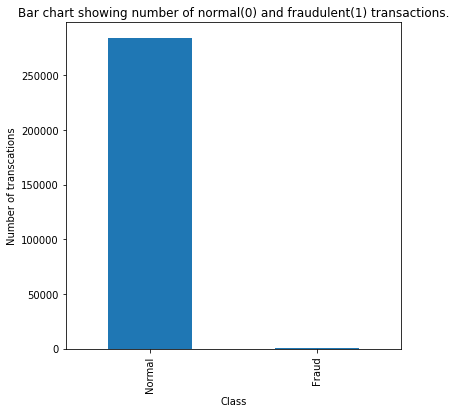

In [14]:
# Plot 'Class' bar chart
import matplotlib.pyplot as plt

ax = df['Class'].value_counts().plot(kind='bar', figsize=(6,6))
ax_title = ax.set_title("Bar chart showing number of normal(0) and fraudulent(1) transactions.")
ax_xlabel = ax.set_xlabel('Class')
ax_ylabel = ax.set_ylabel('Number of transcations')
ax_xticklabels = ax.set_xticklabels(['Normal','Fraud'])

In [15]:
# Describe transcation amount
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
# Transaction amount standard deviation
df['Amount'].std()

250.1201092402221

In [17]:
# Transaction amount variance
df['Amount'].var()

62560.069046340635

In [18]:
# Define normal and fraudulent transcation DataFrames
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [19]:
# Describe normal transaction amount
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
# Describe fraud transaction amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

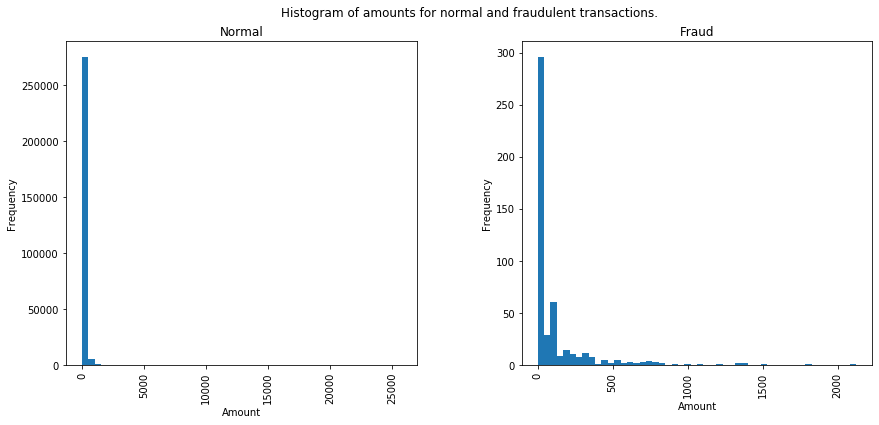

In [21]:
# Plot histogram of amounts for normal and fraudulent transactions

ax = df['Amount'].hist(by=df['Class'], figsize=(14,6), bins=50, sharex=False, layout=(1,2))
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Normal')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Fraud')
title = plt.suptitle('Histogram of amounts for normal and fraudulent transactions.')

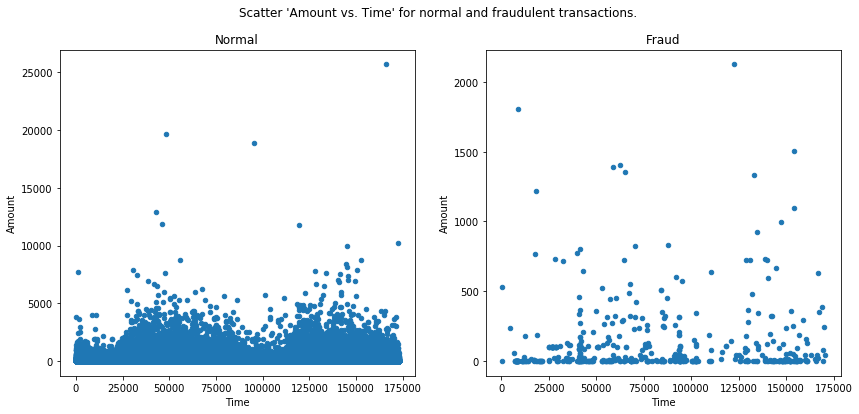

In [22]:
# Scatter plot 'Amount vs. Time' for normal and fraudulent transactions

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharey=False)
fig.suptitle('Scatter \'Amount vs. Time\' for normal and fraudulent transactions.')

normal.plot.scatter(x='Time', y='Amount', legend=False, ax=ax1)
ax1_title = ax1.set_title("Normal")

fraud.plot.scatter(x='Time', y='Amount', legend=False, ax=ax2)
ax2_title = ax2.set_title("Fraud")

## Logistic regression

In [23]:
features = df.drop(['Class'], axis=1)
label = df['Class']

### Split data into training and test sets

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state = 9)

### Train the algorithm

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Training accuracy

In [26]:
logistic_regressor.score(x_train, y_train)

0.998931602495937

### Test model on test set

In [27]:
y_pred = logistic_regressor.predict(x_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [28]:
# Results for first 5 examples of the test set
results.head()

,Actual,Predicted
210658,0,0
4285,0,0
209292,0,0
184766,0,0
267219,0,0


In [29]:
from sklearn import metrics
print('Testing accuracy:', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.9987594068560327


In [30]:
# Classifiation report (https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.70      0.56      0.62       156

    accuracy                           1.00     85443
   macro avg       0.85      0.78      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
actual_labels = ['actual_normal', 'actual_fraud']
pred_labels = ['predicted_normal', 'predicted_fraud']
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix, index=actual_labels, columns=pred_labels)
matrix_df

,predicted_normal,predicted_fraud
actual_normal,85250,37
actual_fraud,69,87


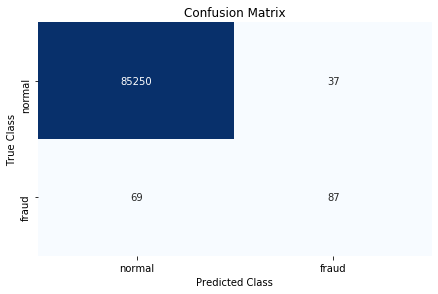

In [32]:
import seaborn as sns

class_labels = ['normal', 'fraud']
matrix_df = pd.DataFrame(matrix, index=class_labels, columns=class_labels)
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues", fmt = 'd')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Decision Trees

### Train the algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Training accuracy

In [34]:
decision_tree.score(x_train, y_train)

1.0

### Test model on test set

In [35]:
y_pred = decision_tree.predict(x_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [36]:
# Results for first 5 examples of the test set
results.head()

,Actual,Predicted
210658,0,0
4285,0,0
209292,0,0
184766,0,0
267219,0,0


In [37]:
print('Testing accuracy:', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.9990871107053826


In [38]:
# Classifiation report (https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.76      0.72      0.74       156

    accuracy                           1.00     85443
   macro avg       0.88      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
actual_labels = ['actual_normal', 'actual_fraud']
pred_labels = ['predicted_normal', 'predicted_fraud']
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(matrix, index=actual_labels, columns=pred_labels)
matrix_df

,predicted_normal,predicted_fraud
actual_normal,85252,35
actual_fraud,43,113


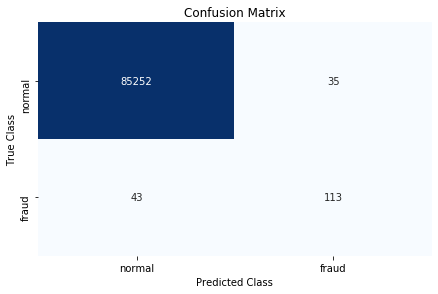

In [40]:
class_labels = ['normal', 'fraud']
matrix_df = pd.DataFrame(matrix, index=class_labels, columns=class_labels)
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues", fmt = 'd')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Decision Tree

[Text(120.38910039429129, 212.91, 'X[17] <= -2.704\nentropy = 0.003\nsamples = 199364\nvalue = [199028, 336]'),
 Text(97.28642987156934, 203.85, 'X[12] <= -2.196\nentropy = 0.363\nsamples = 310\nvalue = [74, 236]'),
 Text(80.83598092352122, 194.79, 'X[26] <= -0.225\nentropy = 0.289\nsamples = 285\nvalue = [50, 235]'),
 Text(58.39364659704498, 185.73, 'X[27] <= 1.253\nentropy = 0.478\nsamples = 99\nvalue = [39, 60]'),
 Text(46.19198909915498, 176.67, 'X[14] <= -3.176\nentropy = 0.357\nsamples = 73\nvalue = [17, 56]'),
 Text(39.21961338607498, 167.60999999999999, 'X[9] <= 5.756\nentropy = 0.225\nsamples = 62\nvalue = [8, 54]'),
 Text(35.73342552953498, 158.55, 'X[13] <= 1.621\nentropy = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(26.14640892404999, 149.49, 'X[27] <= 1.175\nentropy = 0.131\nsamples = 57\nvalue = [4, 53]'),
 Text(17.430939282699992, 140.43, 'X[19] <= 2.492\nentropy = 0.073\nsamples = 53\nvalue = [2, 51]'),
 Text(10.458563569619995, 131.37, 'X[6] <= -3.535\nentropy = 0.039

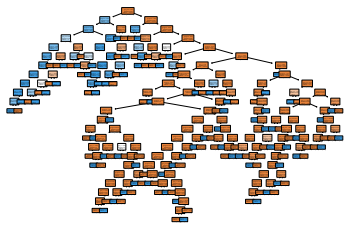

In [47]:
from sklearn import tree

tree.plot_tree(decision_tree, filled=True, rounded=True) 

In [51]:
# Save tree in 'fraud_detection.pdf' file
import graphviz

dot_data = tree.export_graphviz(decision_tree, filled=True, rounded=True, special_characters=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("fraud_detection") 

'fraud_detection.pdf'

## Artificial neural network